## Setup

In [ ]:
import pandas as bpd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
plt.style.use('ggplot')

In [ ]:
episodes = bpd.read_csv('data/friends_info.csv')
episodes

,season,episode,title,directed_by,written_by,air_date,us_views_millions,imdb_rating
0,1,1,The Pilot,James Burrows,David Crane & Marta Kauffman,9/22/94,21.50,8.3
1,1,2,The One with the Sonogram at the End,James Burrows,David Crane & Marta Kauffman,9/29/94,20.20,8.1
2,1,3,The One with the Thumb,James Burrows,Jeffrey Astrof & Mike Sikowitz,10/6/94,19.50,8.2
3,1,4,The One with George Stephanopoulos,James Burrows,Alexa Junge,10/13/94,19.70,8.1
4,1,5,The One with the East German Laundry Detergent,Pamela Fryman,Jeff Greenstein & Jeff Strauss,10/20/94,18.60,8.5
...,...,...,...,...,...,...,...,...
231,10,14,The One with Princess Consuela,Gary Halvorson,Story by: Robert CarlockTeleplay by: Tracy Reilly,2/26/04,22.83,8.6
232,10,15,The One Where Estelle Dies,Gary Halvorson,Story by: Mark KunerthTeleplay by: David Crane...,4/22/04,22.64,8.5
233,10,16,The One with Rachel's Going Away Party,Gary Halvorson,Andrew Reich & Ted Cohen,4/29/04,24.51,8.9
234,10,17,The Last One,Kevin S. Bright,Marta Kauffman & David Crane,5/6/04,52.46,9.7


In [ ]:
lines = bpd.read_csv('data/friends_sample.csv')
lines

,text,speaker,season,episode,scene,utterance
0,"Everybody? Shh, shhh. Uhhh... Central Perk is ...",Rachel Green,1,7,1,1
1,(applause),Scene Directions,1,7,1,2
2,"Hi. Um, I want to start with a song thats abou...",Phoebe Buffay,1,7,1,3
3,"Oh, great. This is just...",Chandler Bing,1,7,2,1
4,(Chandler sees that there is a gorgeous model ...,Scene Directions,1,7,2,2
...,...,...,...,...,...,...
8452,That I can do.,Joey Tribbiani,10,13,13,9
8453,Come on! You can drink a gallon of milk in 10 ...,Phoebe Buffay,10,13,13,10
8454,"All right, watch me! Okay, you time me. Ready?",Joey Tribbiani,10,13,13,11
8455,Ready... GO!,Phoebe Buffay,10,13,13,12


In [ ]:
emotions = bpd.read_csv('data/friends_emotions.csv')
emotions

,text,speaker,season,episode,scene,utterance,emotion
0,I'm supposed to attach a brackety thing to the...,Ross Geller,1,1,4,1,Mad
1,I'm thinking we've got a bookcase here.,Joey Tribbiani,1,1,4,3,Neutral
2,It's a beautiful thing.,Chandler Bing,1,1,4,4,Joyful
3,What's this?,Joey Tribbiani,1,1,4,5,Neutral
4,I would have to say that is an 'L'-shaped brac...,Chandler Bing,1,1,4,6,Neutral
...,...,...,...,...,...,...,...
12601,"Ahh, yes, I will have a glass of the Merlot",Rachel Green,4,24,25,2,Neutral
12602,Okay.,Air Hostess,4,24,25,3,Neutral
12603,"And uh, he will have a white wine spritzer.",Rachel Green,4,24,25,4,Neutral
12604,"Okay, good. Thank you. I'll be back shortly, a...",Air Hostess,4,24,25,5,Joyful


<a id='section1'></a>
## Experienced Story writers, Teleplay writers & Directors   🎬

In [ ]:
def parse_names(names):
    '''Returns a list of individual names present in the input string.'''
    return(names.split(' & '))

directors_by_episode = episodes.get('directed_by').apply(parse_names)
directors_by_episode

,directed_by
0,[James Burrows]
1,[James Burrows]
2,[James Burrows]
3,[James Burrows]
4,[Pamela Fryman]
...,...
231,[Gary Halvorson]
232,[Gary Halvorson]
233,[Gary Halvorson]
234,[Kevin S. Bright]


In [ ]:
all_dirs = directors_by_episode.iloc[0]
for i in range(1,directors_by_episode.shape[0]):
    all_dirs = all_dirs + directors_by_episode.iloc[i]

directors = bpd.DataFrame().assign(name = all_dirs, num_episodes = all_dirs).groupby('name').count().sort_values(by = 'num_episodes',ascending = False)
directors

,num_episodes
name,
Gary Halvorson,55
Kevin S. Bright,54
Michael Lembeck,24
James Burrows,15
Gail Mancuso,14
Peter Bonerz,12
Ben Weiss,10
David Schwimmer,10
Shelley Jensen,6


In [ ]:
def get_teleplay_writers(names):
    '''Returns a list of names of teleplay writers present in the input string.'''
    return parse_names(names.split('Teleplay by: ')[-1])

In [ ]:
def get_story_writers(names):
    '''Returns a list of names of story writers present in the input string.'''
    return parse_names(names.split('Teleplay by: ')[0].split('Story by: ')[-1])

In [ ]:
def count_episodes(staff):
    '''Returns a DataFrame showing how many episodes each staff member worked on.'''
    all_staff = staff.iloc[0]
    for i in range(1,staff.shape[0]):
        all_staff = all_staff + staff.iloc[i]

    staffs = bpd.DataFrame().assign(name = all_staff, num_episodes = all_staff).groupby('name').count().sort_values(by = 'num_episodes',ascending = False)
    return staffs
# An example call to your function. Feel free to change this and try out other inputs.
count_episodes(directors_by_episode)


,num_episodes
name,
Gary Halvorson,55
Kevin S. Bright,54
Michael Lembeck,24
James Burrows,15
Gail Mancuso,14
Peter Bonerz,12
Ben Weiss,10
David Schwimmer,10
Shelley Jensen,6


In [ ]:
story_writers = count_episodes(episodes.get('written_by').apply(get_story_writers))
story_writers

,num_episodes
name,
Ted Cohen,21
Andrew Reich,21
Scott Silveri,19
Shana Goldberg-Meehan,19
Marta Kauffman,19
David Crane,19
Gregory S. Malins,14
Ellen Plummer,13
Adam Chase,13


In [ ]:
teleplay_writers= count_episodes(episodes.get('written_by').apply(get_teleplay_writers))
teleplay_writers

,num_episodes
name,
Ted Cohen,22
Andrew Reich,22
Scott Silveri,21
Marta Kauffman,20
David Crane,20
Shana Goldberg-Meehan,19
Gregory S. Malins,15
Adam Chase,15
Ellen Plummer,13


In [ ]:
experienced_directors = np.array(directors[directors.get('num_episodes') >= 20].index)
experienced_writers = np.array(teleplay_writers[(teleplay_writers.get('num_episodes') >= 20) & (story_writers.get('num_episodes') >= 20)].index)

print(f'The experienced directors are {experienced_directors}')
print(f'The experienced writers are {experienced_writers}')

The experienced directors are ['Gary Halvorson' 'Kevin S. Bright' 'Michael Lembeck']
The experienced writers are ['Ted Cohen' 'Andrew Reich']


<ipython-input-161-af6fd4cff21f>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  experienced_writers = np.array(teleplay_writers[(teleplay_writers.get('num_episodes') >= 20) & (story_writers.get('num_episodes') >= 20)].index)


<a id='section2'></a>
## Gary Halvorson Vs Kevin S. Bright 🏆

In [ ]:
#mean episode rating for each director
single_ep = episodes[episodes.get('directed_by').str.contains('&') == False]
mean_by_director = bpd.DataFrame().assign(name = single_ep.get('directed_by'), mean_rating = single_ep.get('imdb_rating'))
mean_by_director = mean_by_director.groupby('name').mean()
mean_by_director

,mean_rating
name,
Alan Myerson,8.450000
Andrew Tsao,8.600000
Arlene Sanford,8.100000
Ben Weiss,8.300000
Dana DeValley Piazza,8.500000
Dana DeVally Piazza,8.200000
David Schwimmer,8.550000
David Steinberg,8.500000
Ellen Gittelsohn,8.300000


In [ ]:
mean_by_director.get('mean_rating').loc['Gary Halvorson']

8.401851851851852

In [ ]:
mean_by_director.get('mean_rating').loc['Gary Halvorson']

8.401851851851852

In [ ]:
# we will perform bootstraping to check how accurate is Gary's rating
def simulate_estimates(director_df, director, repetitions):
    '''Returns an array of length repetitions,
    containing bootstrapped means of the data
    in the imdb_rating column for the given director. '''
    mean_rating = np.array([])
    for i in range(repetitions):
        specific_director = director_df[director_df.get('directed_by') == director]
        specific_director_df_resample = specific_director.sample(specific_director.shape[0], replace = True)
        mean_rating = np.append(mean_rating, specific_director_df_resample.get('imdb_rating').mean())
    return mean_rating

Gary 99% CI: [8.27962962962963, 8.531481481481482]
Kevin 99% CI: [8.490547169811322, 8.820764150943393]


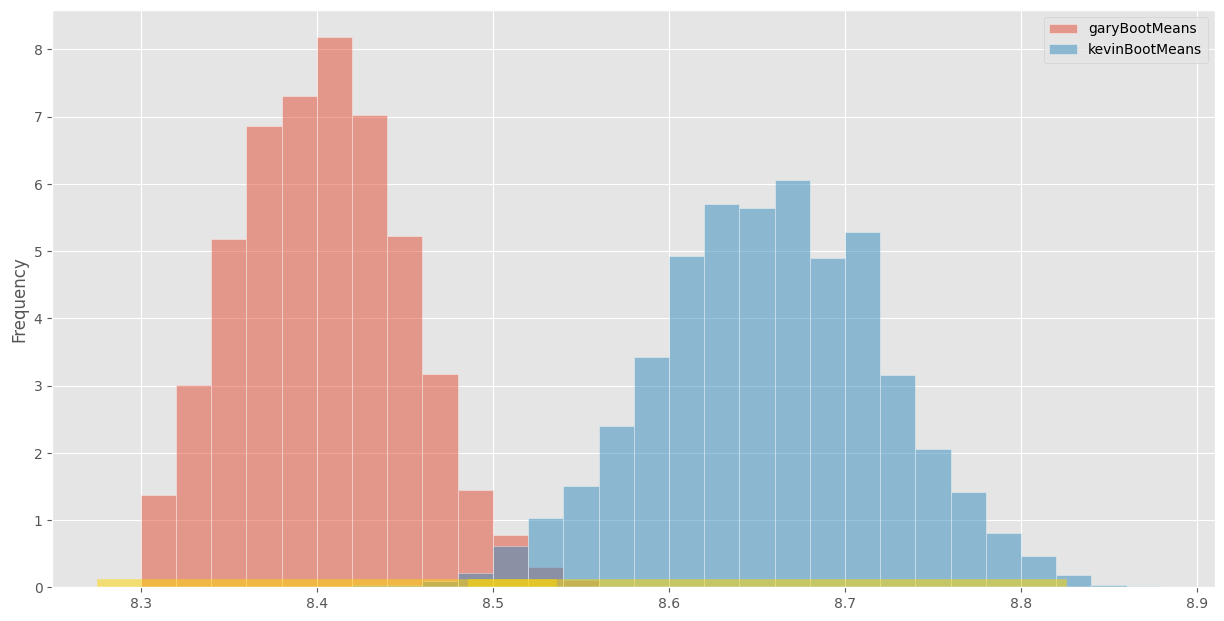

In [ ]:
gary_boot_means = simulate_estimates(episodes, 'Gary Halvorson', 5000)
kevin_boot_means = simulate_estimates(episodes, 'Kevin S. Bright', 5000)

def confidence_interval_99(boot_stats):
    '''Returns a list of the endpoints of a 99% confidence interval based on boot_stats.'''
    return [np.percentile(boot_stats,0.5),np.percentile(boot_stats,99.5)]

print('Gary 99% CI:', confidence_interval_99(gary_boot_means))
print('Kevin 99% CI:', confidence_interval_99(kevin_boot_means))

bpd.DataFrame().assign(garyBootMeans = gary_boot_means, kevinBootMeans = kevin_boot_means).plot(kind = 'hist', density = True, alpha = 0.5, bins = np.arange(8.3,8.9,0.02),figsize = (15,7.5),ec = 'w');
plt.plot(confidence_interval_99(gary_boot_means), [0, 0], color='gold', linewidth=12, label='95% confidence interval', zorder=2,alpha= 0.5);
plt.plot(confidence_interval_99(kevin_boot_means), [0, 0], color='gold', linewidth=12, label='95% confidence interval', zorder=2, alpha = 0.5);

<Figure size 1500x750 with 0 Axes>

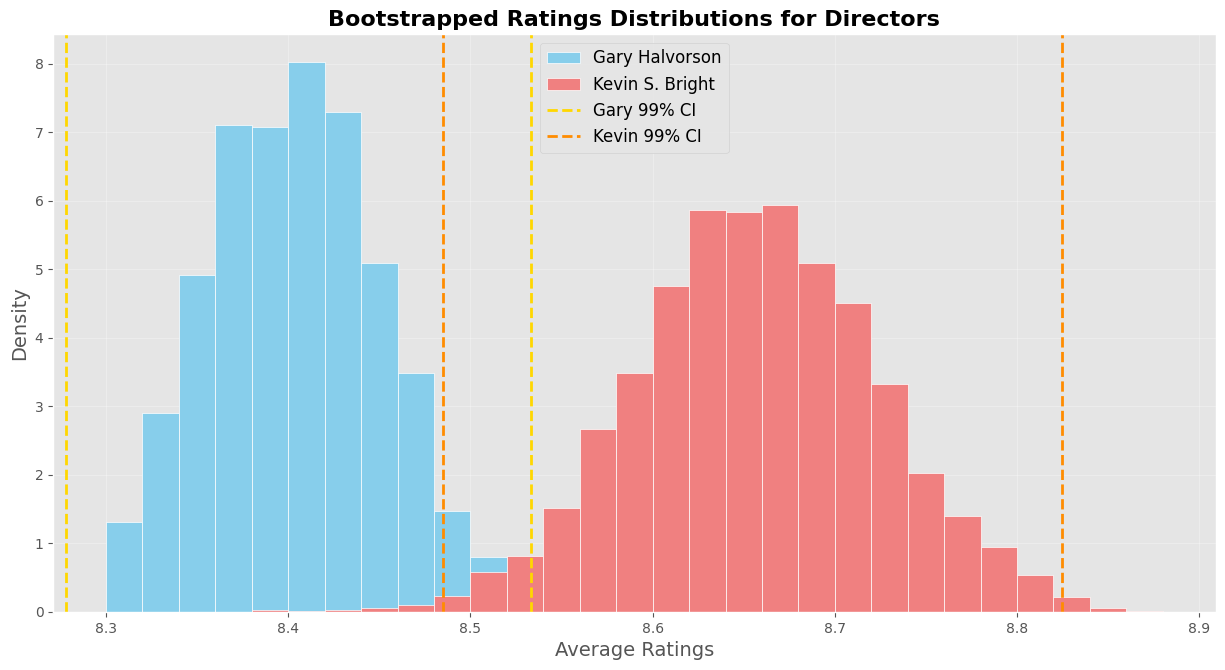

In [ ]:
gary_boot_means =  simulate_estimates(episodes, 'Gary Halvorson', 5000)
kevin_boot_means = simulate_estimates(episodes, 'Kevin S. Bright', 5000)

def confidence_interval_99(boot_stats):
    '''Returns a list of the endpoints of a 99% confidence interval based on boot_stats.'''
    return [np.percentile(boot_stats, 0.5), np.percentile(boot_stats, 99.5)]

# Calculate confidence intervals
gary_ci = confidence_interval_99(gary_boot_means)
kevin_ci = confidence_interval_99(kevin_boot_means)

# Create DataFrame for plotting
df = bpd.DataFrame({
    'Gary Halvorson': gary_boot_means,
    'Kevin S. Bright': kevin_boot_means
})

# Plot histogram
plt.figure(figsize=(15, 7.5))
df.plot(kind='hist',
        density=True,
        bins=np.arange(8.3, 8.9, 0.02),
        figsize=(15, 7.5),
        ec='w',
        color=['skyblue', 'lightcoral'])

# Highlight confidence intervals
plt.axvline(gary_ci[0], color='gold', linestyle='--', linewidth=2, label='Gary 99% CI')
plt.axvline(gary_ci[1], color='gold', linestyle='--', linewidth=2)
plt.axvline(kevin_ci[0], color='darkorange', linestyle='--', linewidth=2, label='Kevin 99% CI')
plt.axvline(kevin_ci[1], color='darkorange', linestyle='--', linewidth=2)

# Titles and labels
plt.title('Bootstrapped Ratings Distributions for Directors', fontsize=16, fontweight='bold')
plt.xlabel('Average Ratings', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

From what we've done so far, we've established that Kevin's episodes are generally rated better than Gary's episodes, however there is some overlap in their confidence intervals. This means it could be the case that Gary is just as strong a director as Kevin, but this is just not reflected in our sample.

We'll address this possibility by performing a hypothesis test with the following hypotheses:

- **Null Hypothesis:** The mean rating of Kevin's episodes in the population equals the mean rating of Gary's episodes in the population. Equivalently, the difference in the mean rating for Kevin's and Gary's episodes in the population equals 0.
- **Alternative Hypothesis:** The mean rating of Kevin's episodes in the population does not equal the mean rating of Gary's episodes in the population. Equivalently, the difference in the mean rating for Kevin's and Gary's episodes in the population does not equal 0.

In [ ]:
difference_means = simulate_estimates(episodes, 'Kevin S. Bright', 1000)- simulate_estimates(episodes, 'Gary Halvorson', 1000)
difference_means[:10]

array([0.27952481, 0.20684836, 0.32809224, 0.4148847 , 0.17075472,
       0.26963662, 0.33249476, 0.33120196, 0.22316562, 0.221174  ])

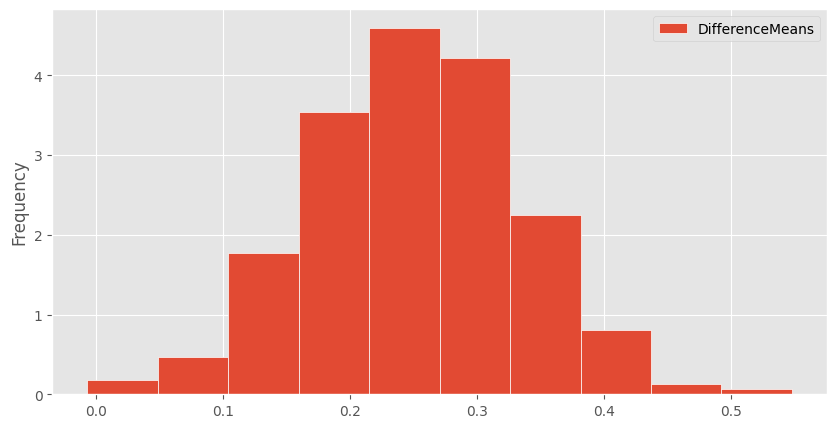

In [ ]:
(bpd.DataFrame().assign(DifferenceMeans = difference_means)
 .plot(kind='hist', density=True, ec='w', figsize=(10, 5)));

In [ ]:
kevin_gary_difference_CI = confidence_interval_99(difference_means)
kevin_gary_difference_CI

[0.03312229210342335, 0.4679783368273911]

We see that 0 does not lie between [0.06270789657582077, 0.46824598183088534] this means that Kevin's episodes in the population does not equals the mean rating of Gary's episodes in the population

We have now discovered which of these two directors would likely make better episodes for your reboot. However, we also want to know whether Gary and Kevin's episodes have other differences besides the ratings they generate. For example, does one of them tend to direct episodes with more views?

In [ ]:
def compare_gary_kevin(sample_df, variable, repetitions):
    '''For each of Gary and Kevin, display a distribution of bootstrapped means and
    a confidence interval for the mean value of the variable from sample_df.'''

    kevin_means, gary_means = np.array([]), np.array([])
    directors = ['Gary Halvorson', 'Kevin S. Bright']
    for director in directors:
        for i in range(repetitions):
            director_df = sample_df[sample_df.get('directed_by') == director]
            director_df_sample_mean = director_df.sample(director_df.shape[0], replace=True).get(variable).mean()
            if director == 'Gary Halvorson':
                gary_means = np.append(gary_means, director_df_sample_mean)
            else:
                kevin_means = np.append(kevin_means, director_df_sample_mean)

    print(f'Gary\'s 99% CI for {variable}: {confidence_interval_99(gary_means)}')
    print(f'Kevin\'s 99% CI for {variable}: {confidence_interval_99(kevin_means)}')

    # Plot enhancements
    t = f'Overlaid Distribution of Estimated Mean {variable} for Gary\'s and Kevin\'s Episodes'
    l = [f'Mean of Gary\'s Episode {variable}', f'Mean of Kevin\'s Episode {variable}']

    # Create the plot
    df = bpd.DataFrame().assign(Gary_means_estimate=gary_means, Kevin_means_estimate=kevin_means)
    ax = df.plot(kind='hist',
                 ec='w',
                 density=True,
                 bins=20,
                 figsize=(12, 6),
                 title=t,
                 color=['skyblue', 'lightcoral'])

    # Add labels and titles
    plt.xlabel(f'Mean {variable.title()}', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.title(t, fontsize=16, fontweight='bold')

    # Add gridlines
    plt.grid(alpha=0.3)

    # Add a legend
    plt.legend(l, fontsize=12)

    # Add vertical lines for means
    plt.axvline(confidence_interval_99(gary_means)[0], color='gold', linestyle='--', linewidth=2, label='Gary 99% CI')
    plt.axvline(confidence_interval_99(gary_means)[1], color='gold', linestyle='--', linewidth=2)
    plt.axvline(confidence_interval_99(kevin_means)[0], color='darkorange', linestyle='--', linewidth=2, label='Kevin 99% CI')
    plt.axvline(confidence_interval_99(kevin_means)[1], color='darkorange', linestyle='--', linewidth=2)


    # Add the legend with means
    plt.legend(fontsize=12)

    # Show the plot
    plt.show()


<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q2_9
manual: True
points: 2

-->

Gary's 99% CI for us_views_millions: [21.56203055555556, 23.179320370370373]
Kevin's 99% CI for us_views_millions: [25.35508113207547, 29.902303773584904]


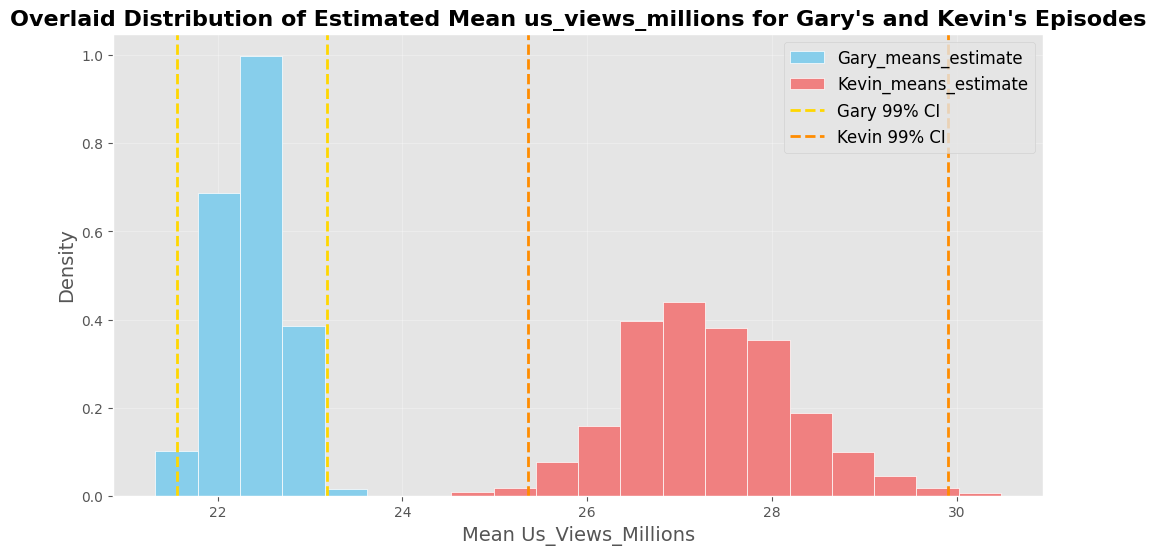

In [ ]:
compare_gary_kevin(episodes, 'us_views_millions', 1000)

Gary's 99% CI for imdb_rating: [8.287018518518519, 8.518527777777779]
Kevin's 99% CI for imdb_rating: [8.496216981132076, 8.820764150943395]


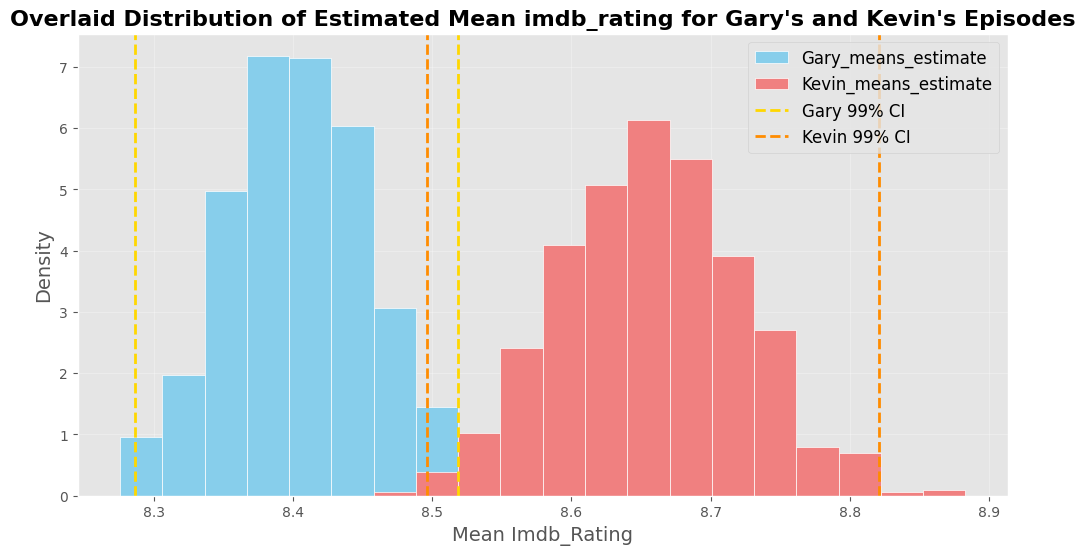

In [ ]:
compare_gary_kevin(episodes, 'imdb_rating', 1000)

The plot shows that kevin's episodes have more views than that of gary's

<a id='section3'></a>
## Distribution of Male and Female characters 👩⚖️🧑

In [ ]:
lines

,text,speaker,season,episode,scene,utterance
0,"Everybody? Shh, shhh. Uhhh... Central Perk is ...",Rachel Green,1,7,1,1
1,(applause),Scene Directions,1,7,1,2
2,"Hi. Um, I want to start with a song thats abou...",Phoebe Buffay,1,7,1,3
3,"Oh, great. This is just...",Chandler Bing,1,7,2,1
4,(Chandler sees that there is a gorgeous model ...,Scene Directions,1,7,2,2
...,...,...,...,...,...,...
8452,That I can do.,Joey Tribbiani,10,13,13,9
8453,Come on! You can drink a gallon of milk in 10 ...,Phoebe Buffay,10,13,13,10
8454,"All right, watch me! Okay, you time me. Ready?",Joey Tribbiani,10,13,13,11
8455,Ready... GO!,Phoebe Buffay,10,13,13,12


In [ ]:
def main_char(speaker):
    '''Returns True if speaker is a main character, False otherwise.'''
    return speaker in ['Ross Geller','Chandler Bing','Joey Tribbiani','Rachel Green','Monica Geller','Phoebe Buffay']
main_lines = lines[lines.get('speaker').apply(main_char)]
main_lines

,text,speaker,season,episode,scene,utterance
0,"Everybody? Shh, shhh. Uhhh... Central Perk is ...",Rachel Green,1,7,1,1
2,"Hi. Um, I want to start with a song thats abou...",Phoebe Buffay,1,7,1,3
3,"Oh, great. This is just...",Chandler Bing,1,7,2,1
5,"Wow, this is so cool, you guys. The entire cit...",Rachel Green,1,7,3,1
6,"Mom says it's all of Manhattan, parts of Brook...",Monica Geller,1,7,3,2
...,...,...,...,...,...,...
8452,That I can do.,Joey Tribbiani,10,13,13,9
8453,Come on! You can drink a gallon of milk in 10 ...,Phoebe Buffay,10,13,13,10
8454,"All right, watch me! Okay, you time me. Ready?",Joey Tribbiani,10,13,13,11
8455,Ready... GO!,Phoebe Buffay,10,13,13,12


In [ ]:
line_count = main_lines.groupby('speaker').count().get('text').sum()
female_char = ['Rachel Green', 'Monica Geller', 'Phoebe Buffay']
male_char = ['Ross Geller',  'Chandler Bing', 'Joey Tribbiani']
observed_female_prop = main_lines.groupby('speaker').count().get(['text']).loc[female_char].get('text').sum()/line_count
observed_male_prop = main_lines.groupby('speaker').count().get(['text']).loc[male_char].get('text').sum()/line_count

print('Number of Lines: ' + str(line_count))
print('Male Proportion: ' + str(observed_male_prop)) #Proportion of lines spoken by male chars
print('Female Proportion: ' + str(observed_female_prop)) #Proportion of lines spoken by female chars

Number of Lines: 6593
Male Proportion: 0.5090247231912635
Female Proportion: 0.49097527680873654


`observed_female_prop` and `observed_male_prop` are similar but they're not exactly the same. Is this just random chance that your sample happened to include more lines by male main characters? Or is the case that throughout the show *Friends*, lines spoken by one of the six main characters are actually more likely to be spoken by male characters? Let's do a hypothesis test with the following hypotheses:

- **Null Hypothesis**: Throughout the ten seasons of *Friends*, male main characters speak the same number of lines as female main characters.  
- **Alternative Hypothesis**: Throughout the ten seasons of *Friends*, male main characters speak more lines than female main characters.


In [ ]:
null_distribution = np.array([0.5, 0.5])
null_distribution

array([0.5, 0.5])

For this hypothesis test, we'll use the proportion of male-spoken lines as our test statistic.

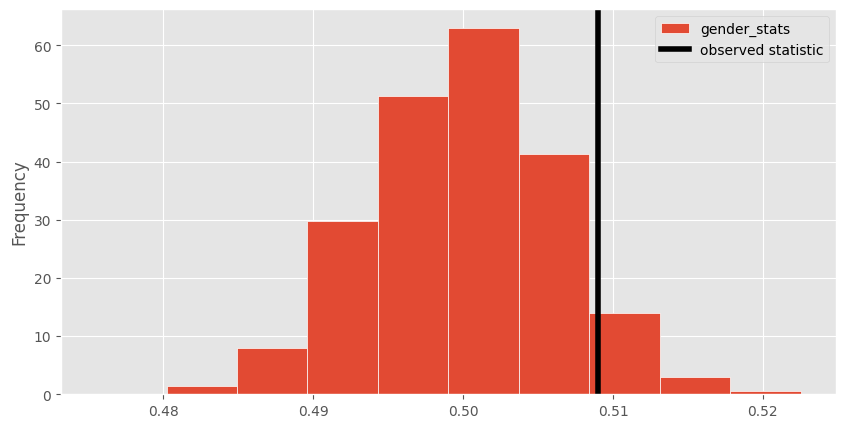

In [ ]:
gender_stats = np.array([np.random.multinomial(line_count,null_distribution)[0]/line_count for i in range(10_000)])

bpd.DataFrame().assign(gender_stats=gender_stats).plot(kind='hist', density=True, ec='w', figsize=(10, 5));
plt.axvline(x=observed_male_prop, color='black', linewidth=4, label='observed statistic')
plt.legend();

In [ ]:
gender_p_value = np.count_nonzero(gender_stats >= observed_male_prop)/len(gender_stats)
gender_p_value

0.0697

We find that the p-value is above the standard cutoff of 0.05 for statistical significance. So in this case, we fail to reject the null. We'll use this information when creating your reboot - We'll assign an equal number of lines to the male main characters and the female main characters.

<a id='section4'></a>
## Section 4: Sentiment Analysis😁😢😨


In [ ]:
emotions

,text,speaker,season,episode,scene,utterance,emotion
0,I'm supposed to attach a brackety thing to the...,Ross Geller,1,1,4,1,Mad
1,I'm thinking we've got a bookcase here.,Joey Tribbiani,1,1,4,3,Neutral
2,It's a beautiful thing.,Chandler Bing,1,1,4,4,Joyful
3,What's this?,Joey Tribbiani,1,1,4,5,Neutral
4,I would have to say that is an 'L'-shaped brac...,Chandler Bing,1,1,4,6,Neutral
...,...,...,...,...,...,...,...
12601,"Ahh, yes, I will have a glass of the Merlot",Rachel Green,4,24,25,2,Neutral
12602,Okay.,Air Hostess,4,24,25,3,Neutral
12603,"And uh, he will have a white wine spritzer.",Rachel Green,4,24,25,4,Neutral
12604,"Okay, good. Thank you. I'll be back shortly, a...",Air Hostess,4,24,25,5,Joyful


In [ ]:
main = bpd.DataFrame().assign(speaker =  ['Monica Geller', 'Ross Geller', 'Rachel Green', 'Chandler Bing', 'Phoebe Buffay', 'Joey Tribbiani'])
main

,speaker
0,Monica Geller
1,Ross Geller
2,Rachel Green
3,Chandler Bing
4,Phoebe Buffay
5,Joey Tribbiani


In [ ]:
main_emotions = main.merge(emotions, on = 'speaker')
main_emotions

,speaker,text,season,episode,scene,utterance,emotion
0,Monica Geller,Oh my God!,1,1,5,1,Mad
1,Monica Geller,"My brother's going through that right now, he'...",1,1,5,3,Sad
2,Monica Geller,-leg?,1,1,5,5,Joyful
3,Monica Geller,You actually broke her watch? Wow! The worst t...,1,1,5,7,Powerful
4,Monica Geller,That's right.,1,1,5,9,Powerful
...,...,...,...,...,...,...,...
9771,Joey Tribbiani,Thanks man.,4,24,23,13,Peaceful
9772,Joey Tribbiani,But what about how much taller he is than me?,4,24,23,15,Scared
9773,Joey Tribbiani,"I mean, there's no way I can make myself talle...",4,24,23,17,Scared
9774,Joey Tribbiani,"Hey, Monica, wow you've been in the bathroom f...",4,24,23,19,Scared


In [ ]:
def conditional_probability(find, given):
    '''Returns the conditional probability of an event given a known condition.'''
    return np.count_nonzero((main_emotions.get(find[0]) == find[1]) & (main_emotions.get(given[0]) == given[1]))/np.count_nonzero(main_emotions.get(given[0]) == given[1])

# This should evalaute to your answer to Question 4.3. Feel free to try calculating other conditional probabilities.
conditional_probability(['speaker', 'Phoebe Buffay'], ['emotion', 'Joyful'])

0.18293838862559242

array(['Phoebe Buffay', 'Monica Geller', 'Rachel Green', 'Ross Geller',
       'Joey Tribbiani', 'Chandler Bing'], dtype=object)

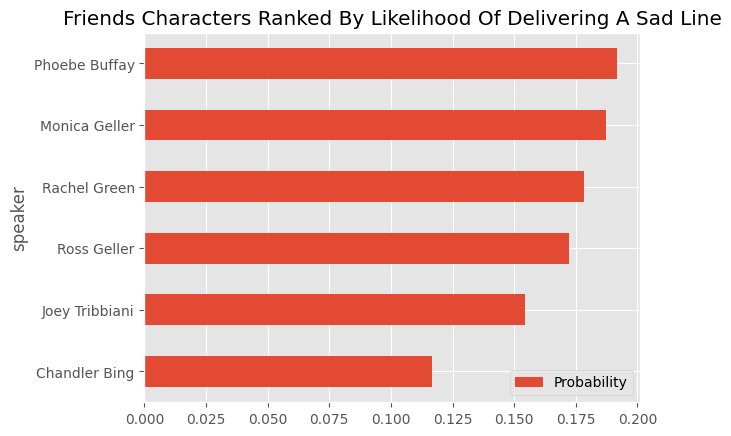

In [ ]:
def rank_speakers_by_emotion(emotion, draw_plot):
    '''Returns an ordered array of main characters, ranked by their conditional probabilities of
    speaking a line of the given emotion. Draws a bar graph when draw_plot is True. '''
    main_char = np.array(main.get('speaker'))
    p = np.array([])
    for i in main_char:
        p = np.append(p,conditional_probability(['speaker', i],['emotion', emotion]))
    data = bpd.DataFrame().assign(speaker = main_char, Probability = p).sort_values(by = 'Probability').set_index('speaker')
    if draw_plot:
        data.plot(kind = 'barh', label = 'Probability', title = f'FRIENDS CHARACTERS RANKED BY LIKELIHOOD OF DELIVERING A {emotion} LINE'.title())
    return np.array(data.take(np.arange(-1,-data.shape[0]-1,-1)).index)#np.array(data.index)[::-1]

# Try to replicate the graph shown in the example.
rank_speakers_by_emotion('Sad', True)


Now, let's try using our function on all seven emotions.

Characters in descending order of Mad: 
 ['Rachel Green' 'Chandler Bing' 'Monica Geller' 'Ross Geller'
 'Joey Tribbiani' 'Phoebe Buffay'] 

Characters in descending order of Sad: 
 ['Phoebe Buffay' 'Monica Geller' 'Rachel Green' 'Ross Geller'
 'Joey Tribbiani' 'Chandler Bing'] 

Characters in descending order of Joyful: 
 ['Chandler Bing' 'Phoebe Buffay' 'Joey Tribbiani' 'Monica Geller'
 'Ross Geller' 'Rachel Green'] 

Characters in descending order of Powerful: 
 ['Joey Tribbiani' 'Chandler Bing' 'Ross Geller' 'Phoebe Buffay'
 'Monica Geller' 'Rachel Green'] 

Characters in descending order of Neutral: 
 ['Chandler Bing' 'Ross Geller' 'Monica Geller' 'Joey Tribbiani'
 'Phoebe Buffay' 'Rachel Green'] 

Characters in descending order of Scared: 
 ['Ross Geller' 'Chandler Bing' 'Joey Tribbiani' 'Monica Geller'
 'Phoebe Buffay' 'Rachel Green'] 

Characters in descending order of Peaceful: 
 ['Chandler Bing' 'Ross Geller' 'Monica Geller' 'Phoebe Buffay'
 'Joey Tribbiani' 'Rachel Green'] 



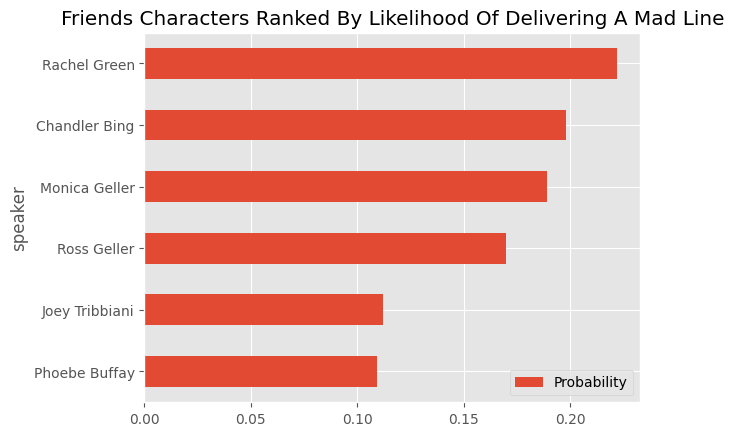

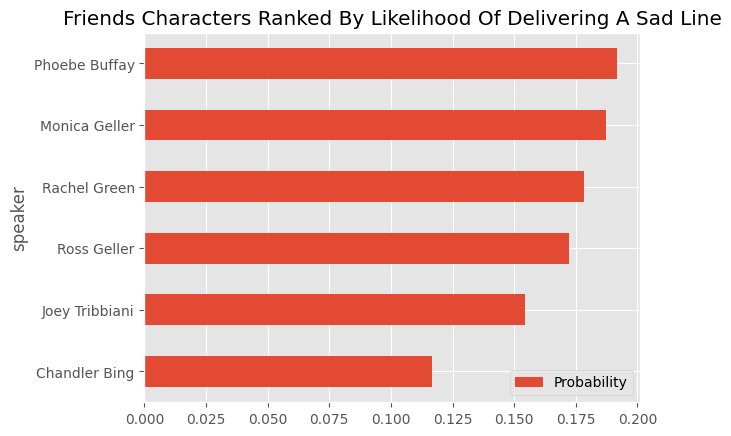

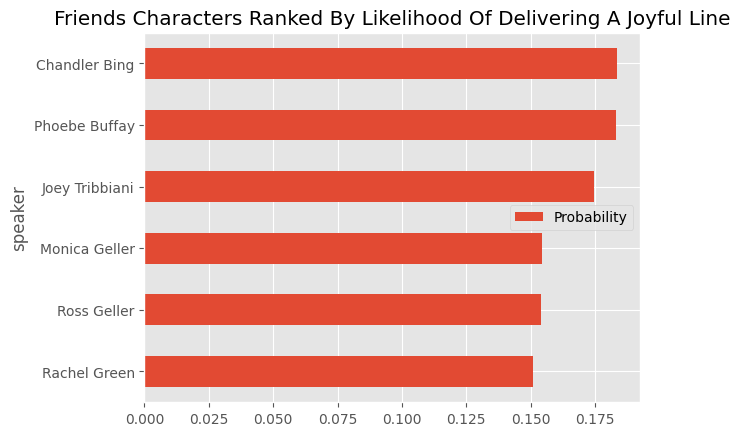

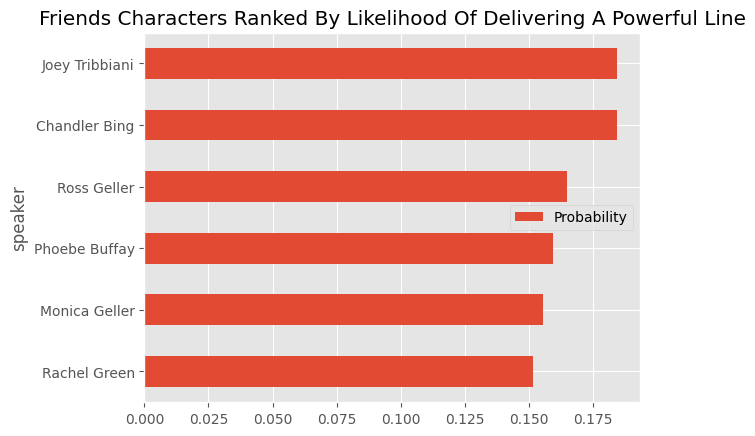

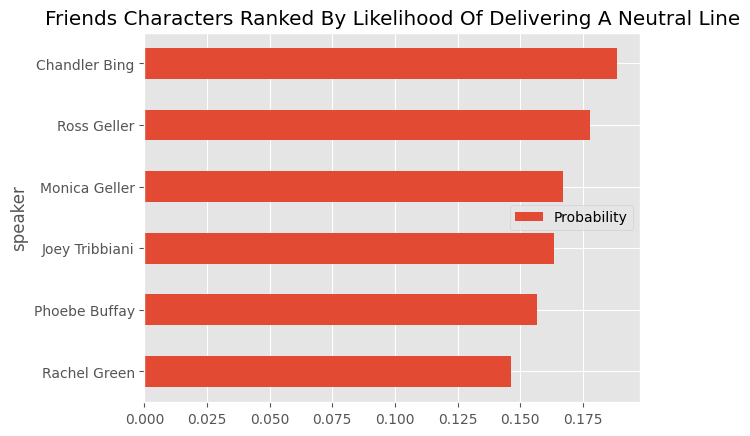

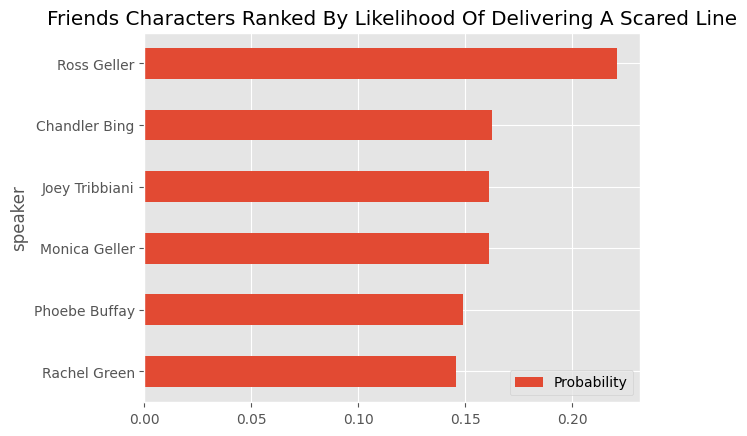

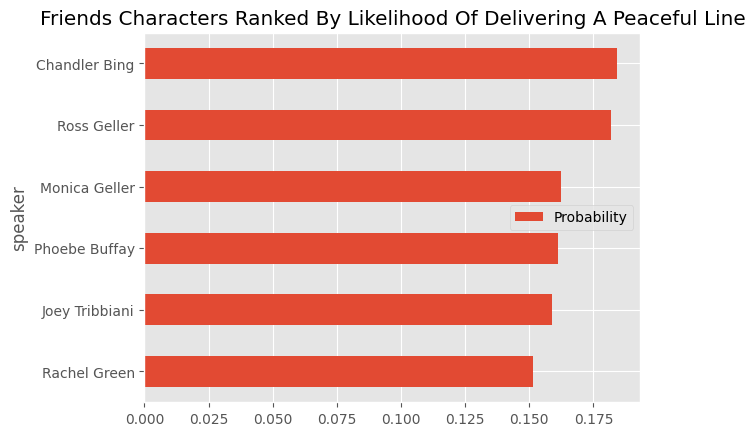

In [ ]:
seven_emotions = main_emotions.get('emotion').unique()
for emotion in seven_emotions:
    print('Characters in descending order of '+emotion+': \n', rank_speakers_by_emotion(emotion, True), '\n')

In [ ]:
def emotions_by_speaker(speaker):
    '''Returns an DataFrame of emotions and their associated probabilities for the given speaker.'''
    probability = np.array([conditional_probability(['emotion', i],['speaker', speaker]) for i in seven_emotions])
    return bpd.DataFrame().assign(emotion = seven_emotions, probability = probability).sort_values(by = 'emotion').set_index('emotion')

# An example call to your function. Feel free to change this and try out other speakers.
emotions_by_speaker('Chandler Bing')

,probability
emotion,
Joyful,0.220890
Mad,0.124429
Neutral,0.306507
Peaceful,0.096461
Powerful,0.080479
Sad,0.044521
Scared,0.126712


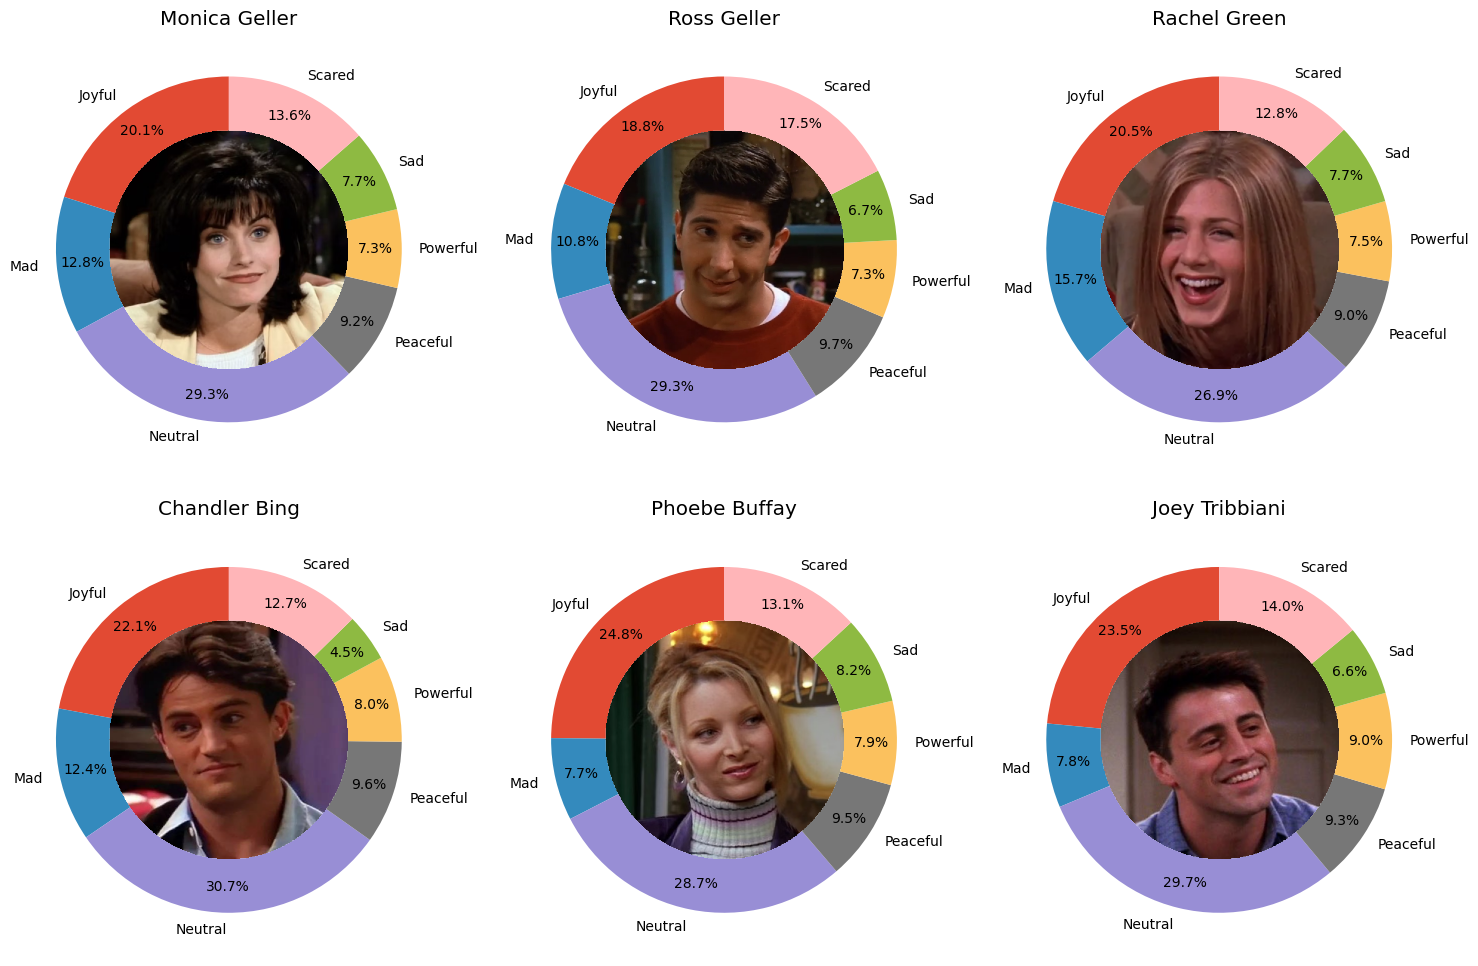

In [ ]:
# Set characters to an array of the names of the six main characters.
characters = np.array(main.get('speaker'))

dfs = {}
for speaker in characters:
    # Call your emotions_by_speaker function on each speaker, and save the result as dfs[speaker].
    dfs[speaker] = emotions_by_speaker(speaker)

def first_name(character):
    # Return the first name of the input character's name, converted to lowercase.
    # For example, RacheL Green -> rachel.
    return character.lower().split(' ')[0]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

max_height = max_width = 0
for character in characters:
    img = plt.imread(f'Rebooting-Friends/reboot_friends/images/face_pics/{first_name(character)}.png')
    h, w, _ = img.shape
    max_height = max(max_height, h)
    max_width = max(max_width, w)

for ax, character in zip(axes, characters):
    df = dfs[character]
    pie, _, _ = ax.pie(df.get('probability'), labels=df.index, startangle=90, autopct='%1.1f%%', pctdistance=0.85, normalize=False)
    ax.set_title(character)

    img = plt.imread(f'Rebooting-Friends/reboot_friends/images/face_pics/{first_name(character)}.png')

    h, w, _ = img.shape
    radius = min(h, w) // 2
    y, x = np.ogrid[:h, :w]
    mask = ((y - h // 2) ** 2 + (x - w // 2) ** 2) > radius ** 2
    img[mask] = [1, 1, 1, 0]

    zoom_factor = max_height / h if h > w else max_width / w
    imagebox = OffsetImage(img, zoom=zoom_factor * 0.43)
    ab = AnnotationBbox(imagebox, (0.5, 0.5), frameon=False, pad=0, xycoords='axes fraction', boxcoords='axes fraction')
    ax.add_artist(ab)

plt.tight_layout()
plt.show()

##Relationship Vs Single 🙊

Do people prefer episodes where at least two of the main characters are in a romantic relationship over episodes where there aren't any couples?

In the show, there are two couples that each date for a period of time.
 - Ross and Rachel are in a relationship from Season 2, Episode 14 to Season 3, Episode 15, inclusive.
 - Monica and Chandler are in a relationship from Season 4, Episode 24 to Season 10, Episode 18, inclusive, which is through the end of the show.


In [ ]:
def romantic(info):
    season = int(info.split(',')[0])
    episode = int(info.split(',')[1])
    if season == 2 and episode>=14:
        return True
    if season == 3 and episode<=15:
        return True

    if season == 4 and episode>=24:
        return True
    if season == 10 and episode<=18:
        return True
    if season in np.arange(5,10):
        return True
    return False
relationship = episodes.assign(couple = episodes.assign(info = episodes.get('season').apply(str) + ',' + episodes.get('episode').apply(str)).get('info').apply(romantic))
relationship

,season,episode,title,directed_by,written_by,air_date,us_views_millions,imdb_rating,couple
0,1,1,The Pilot,James Burrows,David Crane & Marta Kauffman,9/22/94,21.50,8.3,False
1,1,2,The One with the Sonogram at the End,James Burrows,David Crane & Marta Kauffman,9/29/94,20.20,8.1,False
2,1,3,The One with the Thumb,James Burrows,Jeffrey Astrof & Mike Sikowitz,10/6/94,19.50,8.2,False
3,1,4,The One with George Stephanopoulos,James Burrows,Alexa Junge,10/13/94,19.70,8.1,False
4,1,5,The One with the East German Laundry Detergent,Pamela Fryman,Jeff Greenstein & Jeff Strauss,10/20/94,18.60,8.5,False
...,...,...,...,...,...,...,...,...,...
231,10,14,The One with Princess Consuela,Gary Halvorson,Story by: Robert CarlockTeleplay by: Tracy Reilly,2/26/04,22.83,8.6,True
232,10,15,The One Where Estelle Dies,Gary Halvorson,Story by: Mark KunerthTeleplay by: David Crane...,4/22/04,22.64,8.5,True
233,10,16,The One with Rachel's Going Away Party,Gary Halvorson,Andrew Reich & Ted Cohen,4/29/04,24.51,8.9,True
234,10,17,The Last One,Kevin S. Bright,Marta Kauffman & David Crane,5/6/04,52.46,9.7,True


Now, let's state the hypotheses for our permutation test to answer the question: Do episodes where characters **are** in a relationship have higher ratings than those where characters **aren't** in a relationship?


**Null Hypothesis:** There is no difference in average episode rating between groups Relationship and Single.</li>

**Alternate Hypothesis:** Group Relationship has a higher rating than Group Single, on average.</li>



observed statistic: difference in mean rating between groups of episodes that have relationships (R) versus those that don't (S)

In [ ]:
# Ensure 'imdb_rating' is numeric
relationship['imdb_rating'] = bpd.to_numeric(relationship['imdb_rating'], errors='coerce')

# Drop rows with NaN in 'imdb_rating'
relationship = relationship.dropna(subset=['imdb_rating'])

# Compute the observed difference in mean IMDb ratings
couple_observed = (
    relationship.groupby('couple')['imdb_rating']
    .mean()
    .loc[True] -
    relationship.groupby('couple')['imdb_rating']
    .mean()
    .loc[False]
)

couple_observed

0.10969018932874519

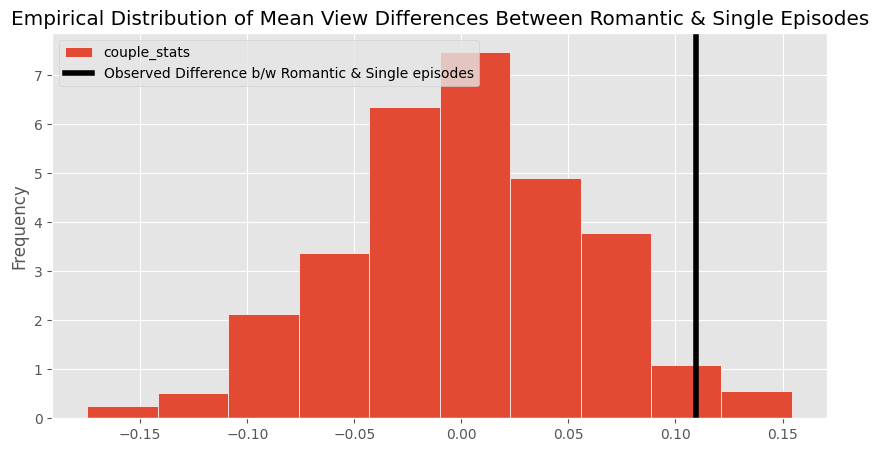

In [ ]:
# Ensure 'imdb_rating' is numeric
relationship['imdb_rating'] = bpd.to_numeric(relationship['imdb_rating'], errors='coerce')

# Drop rows with NaN in 'imdb_rating'
relationship = relationship.dropna(subset=['imdb_rating'])

# Initialize array for simulated differences
couple_stats = np.array([])

# Permutation test
for i in range(1000):
    # Shuffle 'couple' column
    relationship_shuff = relationship.assign(couple_shuff=np.random.permutation(relationship.get('couple')))

    # Calculate mean difference
    diff = (
        relationship_shuff.groupby('couple_shuff')['imdb_rating']
        .mean()
        .loc[True] -
        relationship_shuff.groupby('couple_shuff')['imdb_rating']
        .mean()
        .loc[False]
    )
    couple_stats = np.append(couple_stats, diff)

# Plot the results
bpd.DataFrame().assign(couple_stats=couple_stats).plot(
        kind='hist',
        density=True,
        ec='w',
        figsize=(10, 5),
        title='Empirical Distribution of Mean View Differences Between Romantic & Single Episodes'
    )
plt.axvline(couple_observed, color='black', linewidth=4, label='Observed Difference b/w Romantic & Single episodes')
plt.legend()
plt.show()


In [ ]:
p_couple = np.count_nonzero(couple_stats>=couple_observed)/len(couple_stats)
p_couple

0.024

With a p-value of 0.025, we reject the null hypothesis at the 5% significance level, concluding that episodes in the "Relationship" group have significantly higher average ratings than those in the "Single" group.

Although we can't determine from our permutation test whether characters being in a relationship *causes* better ratings, we can detect an association. We'll use this information when planning the storyline of the reboot to determine whether to include a romance angle! 💘

<a id='section6'></a>
##Generating Episode Titles 🖨️


In [ ]:
titles = np.array(episodes.get('title'))
for i in np.arange(10):
    print(np.random.choice(titles, replace=False))

The One with the Red Sweater
The One Where Ross Finds Out
The One with Mrs. Bing
The One with the Worst Best Man Ever
The One with the Blind Dates
The One with the Inappropriate Sister
The One with Ross's Inappropriate Song
The One with the Rumor
The One with the Stain
The One That Could Have Been


When generating episode titles for our reboot, we want to use many of the same words that appear in the titles of *Friends* episodes, so that our reboot titles stay true to the spirit of the original show and follow a similar structure. The simplest way to do this is to randomly select words, one at a time and independently, from the set of words included `titles`.


In [ ]:
every_word = np.array((' ').join(titles).split(' '))
every_word

array(['The', 'Pilot', 'The', ..., 'The', 'Last', 'One'], dtype='<U14')

Some words appear in `every_word` much more frequently than others. We'd want these more common words, like `'The'` to appear more frequently in our generated titles, since they appear more frequently in actual *Friends* titles. Let's generate our titles randomly, one word at a time, so that each word is independently selected with a probability proportional to how often the word appears in a *Friends* title.

In [ ]:
def find_proportion(word):
    '''Returns the proportion of words equal to the input word.'''
    return np.count_nonzero(word == every_word)/len(every_word)

rachel_prop = find_proportion('Rachel')
one_prop = find_proportion('One')
print('Rachel:', rachel_prop )
print('One:', one_prop)

Rachel: 0.010316875460574797
One: 0.17391304347826086


In [ ]:
# prob of generating rachel one rachel title
prob_rachel_one_rachel = rachel_prop * one_prop * rachel_prop
prob_rachel_one_rachel

1.851094248156703e-05

That's about a 1 in 50,000 chance that we'll generate the title `'Rachel One Rachel'`, which is so small primarily because `'Rachel'` is a rare word. The title `'One One One'` has a much larger chance of being generated, about 1 in 200, since `'One'` is a common word.

In [ ]:
prob_one_one_one = one_prop ** 3
prob_one_one_one

0.0052601298594559046

While the strategy we've outlined gives a way of randomly generating reboot titles so that more common words are more likely to appear in the reboot title, it is unsatisfactory in many ways. Primarily, with this strategy, we can get titles like `'Rachel One Rachel'` and `'One One One'`, which not only don't make sense, but don't follow the structure of *Friends* episode titles that started with phrases like `'The One Where'`.

Instead of considering the probabilities of individual words, let's consider the probability of **pairs** of consecutive words. For example, the pair of words `'The One'` is quite common and the pair of words `'The Last'` is quite rare. This says that when we generate a reboot title randomly one word at a time, if we start with the word `'The'`, we should be more likely to follow it with `'One'` than `'Last'`.

We'll work on calculating the probability distribution of words that immediately follow a given word in *Friends* episode titles. As before, this is case-sensitive. For example, if the word is `'The'`, we'd want to look for want words that follow `'The'` only, not words that follow `'the'`.

In [ ]:
def next_word(title, word):
    '''Given a title and an input word, return an array of all
    words in the title that immediately follow the input word.'''
    ans = np.array([])
    words = title.split(' ')
    for i in range(len(words)-1):
        if words[i] == word:
            ans = np.append(ans,words[i+1])
    return ans

# An example call to your function. Feel free to change this and try out other inputs.
next_word('This is the final project of the course and there is also the final exam', 'the')

array(['final', 'course', 'final'], dtype='<U32')

In [ ]:
def words_following(word):
    '''Given an input word, return an array of all words that
    immediately follow the input word in episode titles in titles.'''
    arr = np.array([])
    for title in titles:
        arr = np.append(arr,next_word(title, word))
    return arr

# An example call to your function. Feel free to change this and try out other input words.
words_following('One')

array(['with', 'with', 'with', 'with', 'with', 'with', 'Where', 'Where',
       'with', 'with', 'with', 'with', 'with', 'with', 'with', 'with',
       'with', 'Where', 'with', 'with', 'with', 'with', 'Where', 'with',
       'with', 'Where', 'with', 'with', 'with', 'Where', 'with', 'with',
       'with', 'with', 'After', 'After', 'with', 'Where', 'Where',
       'Where', 'Where', 'Where', 'Where', 'with', 'with', 'with', 'with',
       'with', 'Where', 'with', 'with', 'with', 'with', 'with', 'with',
       'with', 'Where', 'Where', 'with', 'Where', 'with', 'Where', 'with',
       'Without', 'with', 'with', 'with', 'with', 'with', 'with', 'with',
       'at', 'with', 'with', 'with', 'with', 'with', 'with', 'Where',
       'with', 'Where', 'with', 'with', 'with', 'with', 'with', 'with',
       'with', 'with', 'with', 'with', 'with', 'with', 'with', 'with',
       'with', 'After', 'with', 'Hundredth', 'Where', 'with', 'with',
       'Where', 'with', 'with', 'with', 'with', 'with', 'with', 

Now that we know how to find all the words that follow a given word, we can create a probability distribution, where the probability of each subsequent word is just the proportion of times that word follows the given word.


In [ ]:
def find_prob_distribution(word):
    '''Returns a DataFrame containing the probability distribution
    of words that can follow the given input word.'''
    foll_words = words_following(word)
    df = bpd.DataFrame().assign(word = foll_words , prob = foll_words).groupby('word').count()
    return df.assign(prob = df.get('prob')/df.get('prob').sum()).sort_values(by = 'prob', ascending = False)
find_prob_distribution('The')

,prob
word,
One,0.987288
Last,0.008475
Pilot,0.004237


Now that we know how to generate titles based on pairs of words, let's write a function that takes no inputs, and returns a randomly generated title by starting with the word `'The'`, then adding a new word based on the conditional probabilities of words that can follow `'The'`. We'll continue adding new words after each previous word, until we encounter a word that never had any words after it in an episode title (like `'Proposes'` in our example above). At that point, we'll stop generating new words.


In [ ]:
def generate_title():

    generated_title = 'The'
    prob_dist_df = find_prob_distribution('The')

    # Keep generating new words for our title so long as there are
    # words that can follow the most recent word we've added.
    while (prob_dist_df.shape[0] >= 1):

        # Set new_word to a random selection of the words represented in prob_dist_df,
        # chosen according to their probabilities in prob_dist_df.
        new_word = np.random.choice(prob_dist_df.index, p =  np.array(prob_dist_df.get('prob')))

        # Add onto your generated title in the variable generated_title.
        # Make sure to include spaces between words.
        generated_title = generated_title+ ' ' + new_word

        # Update prob_dist_df so that it contains the probability
        # distribution of the word you just added to your title.
        prob_dist_df = find_prob_distribution(new_word)

    return generated_title

generate_title()

'The One with the Rumor'

In [ ]:
count = 0
for i in range(1000):
    gt = generate_title()
    if gt in titles:
        count+=1
prob_real = count/1000

In [ ]:
prob_real

0.571

Now, let's generate episode titles for the first season of the reboot. Most seasons of *Friends* had 24 episodes, so you'll make sure your reboot starts out with a season of 24 episodes.

In [ ]:
for i in np.arange(1, 25):
    print('Reboot Episode', i, ':', generate_title() )

Reboot Episode 1 : The One Where Ross Says Rachel Goes Back to Party!
Reboot Episode 2 : The One Where Phoebe Runs
Reboot Episode 3 : The One with Joey's Dirty Girl from Poughkeepsie
Reboot Episode 4 : The One with Phoebe's Dad
Reboot Episode 5 : The One with Rachel's Sister Babysits
Reboot Episode 6 : The One with Phoebe's Cookies
Reboot Episode 7 : The One with the Male Nanny
Reboot Episode 8 : The One Where Chandler in Vegas
Reboot Episode 9 : The One with the Fake Monica and Rachel Tells...
Reboot Episode 10 : The One with Ross's Thing
Reboot Episode 11 : The One with Joey's New Dress
Reboot Episode 12 : The One Where Monica Sings
Reboot Episode 13 : The One with the Dozen Lasagnas
Reboot Episode 14 : The One with the Blackout
Reboot Episode 15 : The One with the Beach
Reboot Episode 16 : The One Where No One Where Ross Dates Rachel Has a Chick and C.H.E.E.S.E.
Reboot Episode 17 : The One with the Butt
Reboot Episode 18 : The One with the Apothecary Table
Reboot Episode 19 : The On

## First vs Second Half



Which half of the show has more viewers?

In [ ]:
def which(season):
    if season in np.arange(1,6):
        return 'first half'
    return 'second half'

halves = episodes.assign(which_half = episodes.get('season').apply(which))
halves

,season,episode,title,directed_by,written_by,air_date,us_views_millions,imdb_rating,which_half
0,1,1,The Pilot,James Burrows,David Crane & Marta Kauffman,9/22/94,21.50,8.3,first half
1,1,2,The One with the Sonogram at the End,James Burrows,David Crane & Marta Kauffman,9/29/94,20.20,8.1,first half
2,1,3,The One with the Thumb,James Burrows,Jeffrey Astrof & Mike Sikowitz,10/6/94,19.50,8.2,first half
3,1,4,The One with George Stephanopoulos,James Burrows,Alexa Junge,10/13/94,19.70,8.1,first half
4,1,5,The One with the East German Laundry Detergent,Pamela Fryman,Jeff Greenstein & Jeff Strauss,10/20/94,18.60,8.5,first half
...,...,...,...,...,...,...,...,...,...
231,10,14,The One with Princess Consuela,Gary Halvorson,Story by: Robert CarlockTeleplay by: Tracy Reilly,2/26/04,22.83,8.6,second half
232,10,15,The One Where Estelle Dies,Gary Halvorson,Story by: Mark KunerthTeleplay by: David Crane...,4/22/04,22.64,8.5,second half
233,10,16,The One with Rachel's Going Away Party,Gary Halvorson,Andrew Reich & Ted Cohen,4/29/04,24.51,8.9,second half
234,10,17,The Last One,Kevin S. Bright,Marta Kauffman & David Crane,5/6/04,52.46,9.7,second half


let's visualize the difference in viewership between the first half and second half of *Friends* episodes. Create an overlaid density histogram that compares the distribution of `'us_views_millions'` for first half episodes with that of second half episodes.


2.322696370822854

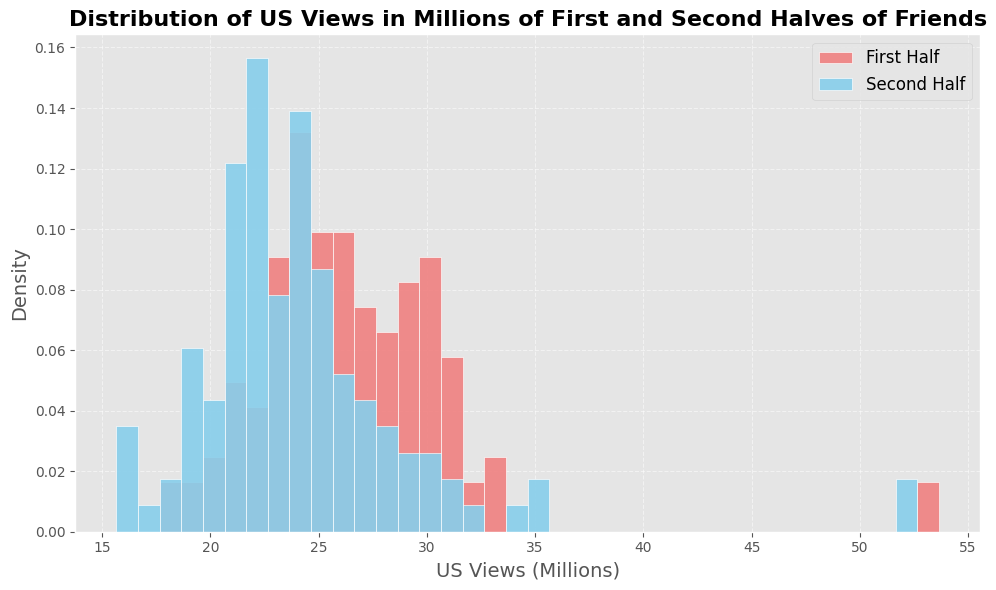

In [ ]:
first_half_data = halves[halves.get('which_half') == 'first half'].get(['us_views_millions'])
second_half_data = halves[halves.get('which_half') == 'second half'].get(['us_views_millions'])

fig, ax = plt.subplots(figsize=(10, 6))
hist_bins = np.arange(halves.get('us_views_millions').min(), halves.get('us_views_millions').max() + 1)

first_half_data.plot(kind='hist', density=True, ax=ax, alpha = 0.9, ec='w', bins=hist_bins, color = 'lightcoral')
second_half_data.plot(kind='hist', density=True, ax=ax, alpha = 0.9, ec='w', bins=hist_bins, color = 'skyblue')

plt.title('Distribution of US Views in Millions of First and Second Halves of Friends', fontsize=16, fontweight='bold')
plt.xlabel('US Views (Millions)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(['First Half', 'Second Half'], fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

view_difference = first_half_data.get('us_views_millions').mean() - second_half_data.get('us_views_millions').mean()
view_difference






We see that viewership was higher in the first half of *Friends* than in the second. Is this difference significant or was it just by chance? Let's perform a permutation test to find out.

**Null Hypothesis:** Viewership of the first and second halves of episodes does not differ systematically; any observed difference is due to random chance.

**Alternate Hypothesis:** Viewership of the first half of episodes is significantly higher than that of the second half.


Let's clean up our DataFrame to focus only on the columns `'us_views_millions'` and `'which_half'`.

We would like to know whether the first half of episodes had significantly **more** viewership than the second half on average.



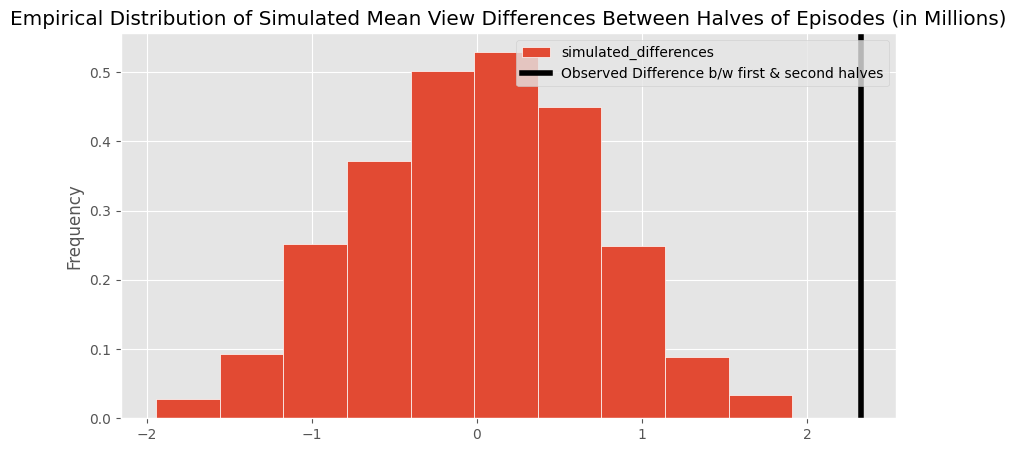

In [ ]:
views_by_group = halves.get(['us_views_millions', 'which_half'])
simulated_differences = np.array([])

for i in range(1000):
    # Shuffle the group labels
    views_by_group_shuff = views_by_group.assign(
        shuff_halves=np.random.permutation(views_by_group.get('which_half'))
    )

    # Group by the shuffled labels and calculate the mean difference
    grouped_means = views_by_group_shuff.groupby('shuff_halves')['us_views_millions'].mean()
    mean_diff = grouped_means.loc['first half'] - grouped_means.loc['second half']
    simulated_differences = np.append(simulated_differences, mean_diff)

# Plot the results
bpd.DataFrame().assign(simulated_differences=simulated_differences).plot(
kind='hist',
density=True,
ec='w',
figsize=(10, 5),
title='Empirical Distribution of Simulated Mean View Differences Between Halves of Episodes (in Millions)'
)
plt.axvline(view_difference, color='black', linewidth=4, label='Observed Difference b/w first & second halves')
plt.legend()
plt.show()


In [ ]:
p_halves = np.count_nonzero(simulated_differences>=view_difference)/len(simulated_differences)
p_halves

0.0

The p-value of 0 indicates that the difference in viewership between the first and second halves of *Friends* episodes is statistically significant, providing strong evidence that the first half had higher viewership.

<a id='section7'></a>
## How many Episodes?🔚

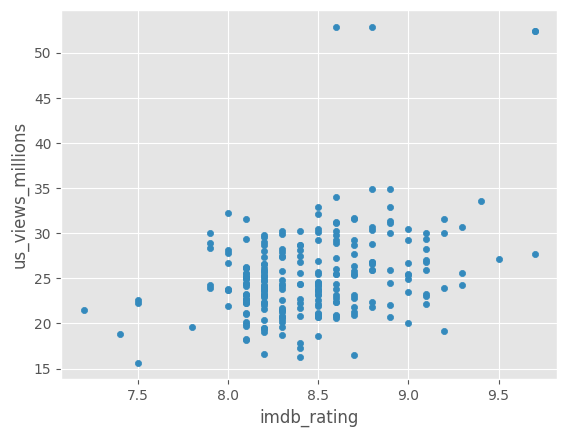

In [ ]:
episodes.plot(kind='scatter', x='imdb_rating', y='us_views_millions');

Here we will do linear regression without using sklearn

In [ ]:
def standard_units(sequence):
    '''Returns the input sequence as an array in standard units.'''
    # Convert the input to an array, if it is not already.
    sequence = np.array(sequence)
    return (sequence - np.mean(sequence))/np.std(sequence)

rating_standard = standard_units(episodes.get('imdb_rating'))
views_standard = standard_units(episodes.get('us_views_millions'))

In [ ]:
def correlation(df, independent, dependent):
    '''Returns the correlation between the independent and dependent variables in the given DataFrame.'''
    independent_su = standard_units(df.get(independent))
    dependent_su = standard_units(df.get(dependent))
    return np.mean(independent_su*dependent_su)

corr = correlation(episodes, 'imdb_rating', 'us_views_millions')
corr

0.37741252071774684

In [ ]:
def reg_slope(df, independent, dependent):
    '''Returns the slope of the regression line in original units.'''
    return correlation(df, independent, dependent) * np.std(df.get(dependent))/np.std(df.get(independent))


def reg_intercept(df, independent, dependent):
    '''Returns the intercept of the regression line in original units.'''
    return df.get(dependent).mean() - df.get(independent).mean()*reg_slope(df, independent, dependent)

slope = reg_slope(episodes,'imdb_rating','us_views_millions')
intercept = reg_intercept(episodes,'imdb_rating','us_views_millions')
slope, intercept

(4.953290444993946, -16.54214275257801)

In [ ]:
def predict(df, independent, dependent):
    '''Returns an array of predicted values of the dependent variable calculated from the regression line.'''
    return reg_slope(df, independent, dependent)*df.get(independent) + reg_intercept(df, independent, dependent)

predicted_views = predict(episodes,'imdb_rating','us_views_millions')
predicted_views

,imdb_rating
0,24.570168
1,23.579510
2,24.074839
3,23.579510
4,25.560826
...,...
231,26.056155
232,25.560826
233,27.542142
234,31.504775


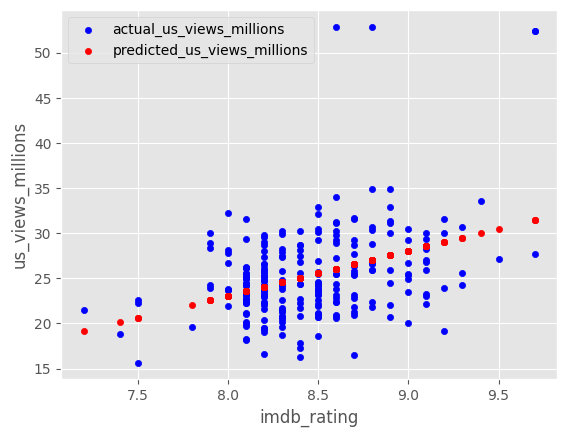

In [ ]:
ax1 = episodes.plot(kind = 'scatter', x = 'imdb_rating', y = 'us_views_millions',color = 'blue', label = 'actual_us_views_millions')
ax2 = episodes.assign(predicted_views = predicted_views).plot(kind = 'scatter', x = 'imdb_rating', y = 'predicted_views', ax = ax1, color = 'red', label = 'predicted_us_views_millions')
plt.ylabel('us_views_millions')
plt.show()

calculating the regression line that would allow you to predict IMDb rating based on viewership in millions.

'The correlation between imdb_rating and us_views_millions is 0.38.  The slope of the regression line is 4.95. The intercept of the regression line is -16.54.'

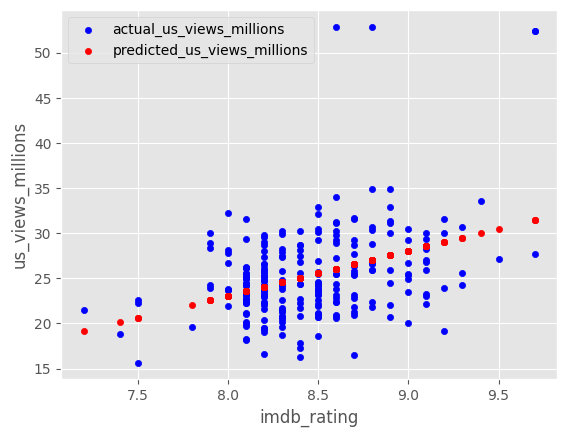

In [ ]:
def display_predictions(df, independent, dependent):
    '''Generates an overlaid scatter plot showing the relationship between the independent and dependent variables in df.
    Returns a string describing the correlation and the slope and intercept of the regression line.'''
    # Create your overlaid scatter plot here.
    ax1 = df.plot(kind = 'scatter', x = independent, y = dependent,color = 'blue', label = f'actual_{dependent}')
    ax2 = df.assign(predicted = predict(df, independent, dependent)).plot(kind = 'scatter', x = independent, y = 'predicted', ax = ax1, color = 'red', label = f'predicted_{dependent}')
    plt.ylabel(dependent)
    # We've provided the code for the return statement.
    return ('The correlation between {0} and {1} is {2}. ' +\
           ' The slope of the regression line is {3}.' + \
           ' The intercept of the regression line is {4}.')\
                .format(independent,
                        dependent,
                        str(round(correlation(df, independent, dependent), 2)),
                        str(round(reg_slope(df, independent, dependent), 2)),
                        str(round(reg_intercept(df, independent, dependent), 2)))

display_predictions(episodes, 'imdb_rating', 'us_views_millions')

'The correlation between us_views_millions and imdb_rating is 0.38.  The slope of the regression line is 0.03. The intercept of the regression line is 7.73.'

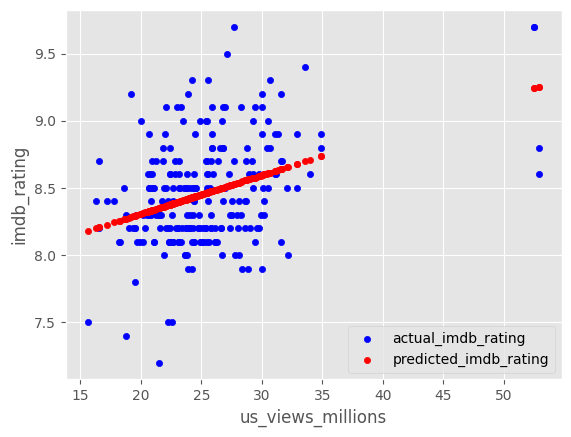

In [ ]:
rating_prediction = display_predictions(episodes, 'us_views_millions', 'imdb_rating')
rating_prediction

There seem to be just a few episodes with 40 million views or more. Since outliers can have a big impact on the regression line, let's see how different our regression line would look if we eliminated these outliers.

'The correlation between us_views_millions and imdb_rating is 0.3.  The slope of the regression line is 0.03. The intercept of the regression line is 7.69.'

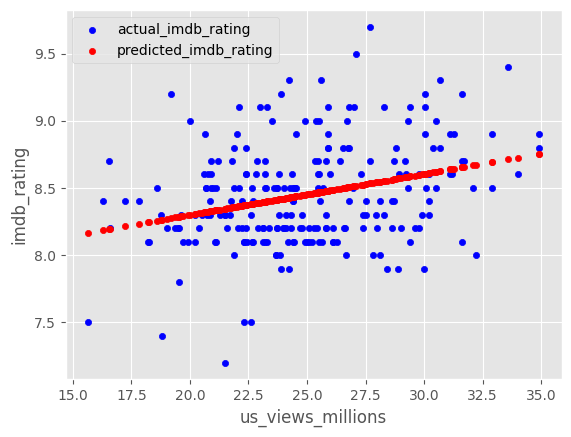

In [ ]:
no_outliers = display_predictions(episodes[episodes.get('us_views_millions')<=40], 'us_views_millions', 'imdb_rating')
no_outliers

Let's use some of the regression tools we've developed in this section to answer an important question about the reboot: how many episodes should it have? You are about to meet with the producers of the reboot to discuss this.

'The correlation between no_eps and us_views_millions is -0.18.  The slope of the regression line is -0.01. The intercept of the regression line is 27.04.'

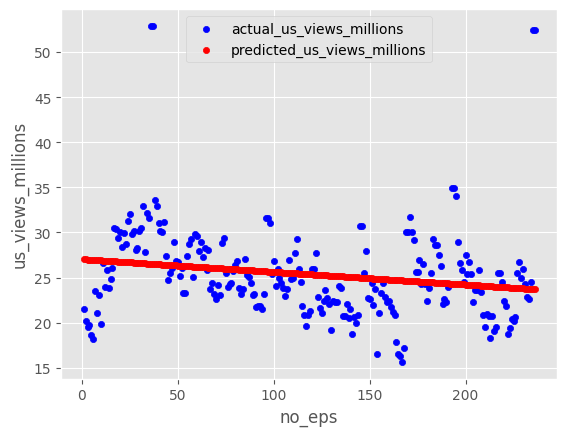

In [ ]:
no_eps = np.arange(1,episodes.get('episode').shape[0]+1)
display_predictions(episodes.assign(no_eps = no_eps),'no_eps' ,'us_views_millions')





Since the slope of the regression line is negative, this means that viewership of *Friends* ultimately declined as more episodes were created. But this wasn't always the case. When the show was just starting off, new episodes were getting more views than past episodes. The regression line fit to just the first 30 episodes, for example, would have a strongly positive slope.


In [ ]:
def display_predictions(df, independent, dependent):
    '''Generates an overlaid scatter plot showing the relationship between the independent and dependent variables in df.
    Returns a string describing the correlation and the slope and intercept of the regression line.'''
    # Create your overlaid scatter plot here.
    ax1 = df.plot(kind = 'scatter', x = independent, y = dependent,color = 'blue', label = f'actual_{dependent}')
    ax2 = df.assign(predicted = predict(df, independent, dependent)).plot(kind = 'scatter', x = independent, y = 'predicted', ax = ax1, color = 'red', label = f'predicted_{dependent}')
    plt.ylabel(dependent)



80

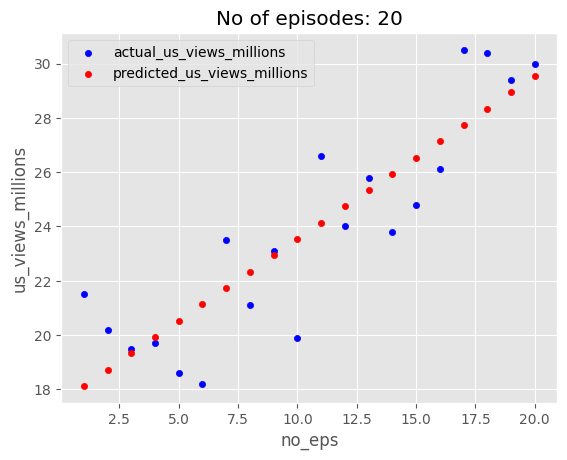

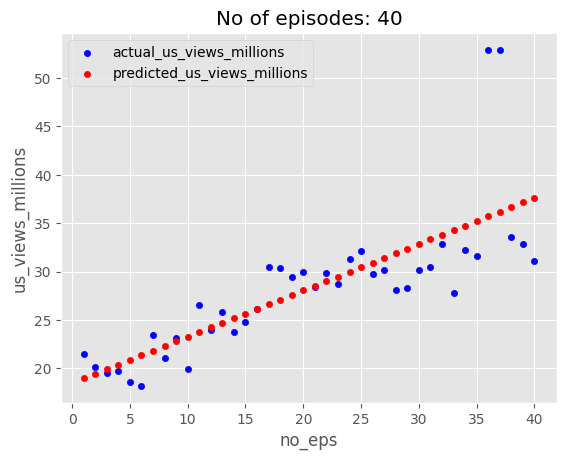

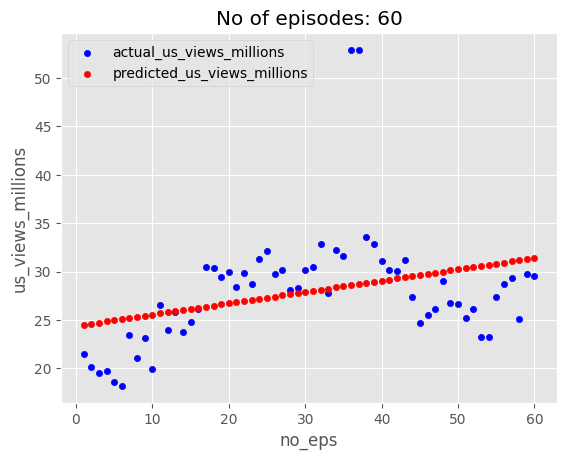

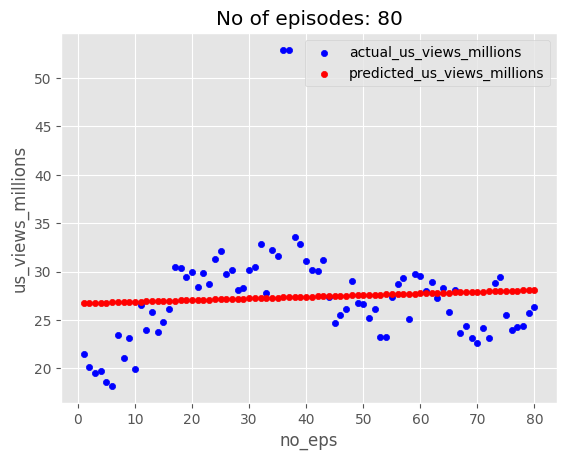

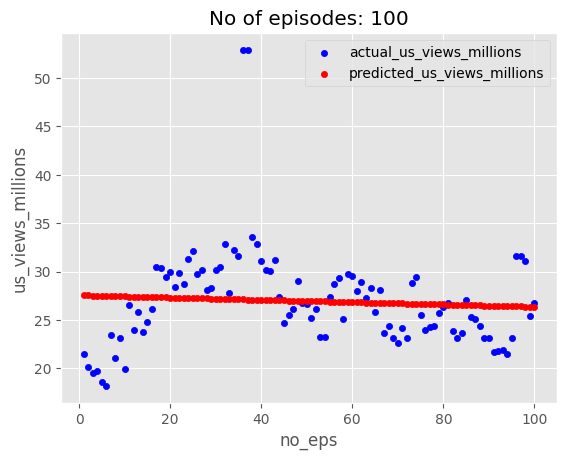

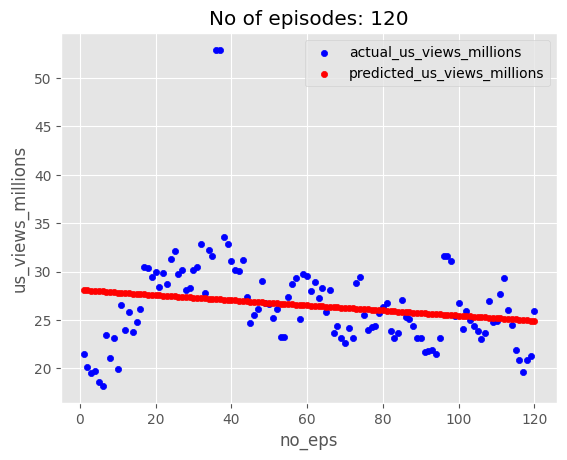

In [ ]:
episodes_num = episodes.assign(no_eps = no_eps)
for i in np.arange(20,140,20):
    display_predictions(episodes_num[episodes_num.get('no_eps')<=i],'no_eps' ,'us_views_millions')
    plt.title(f'No of episodes: {i}')
reboot_length = 80
reboot_length

In [ ]:
from sklearn.linear_model import LinearRegression

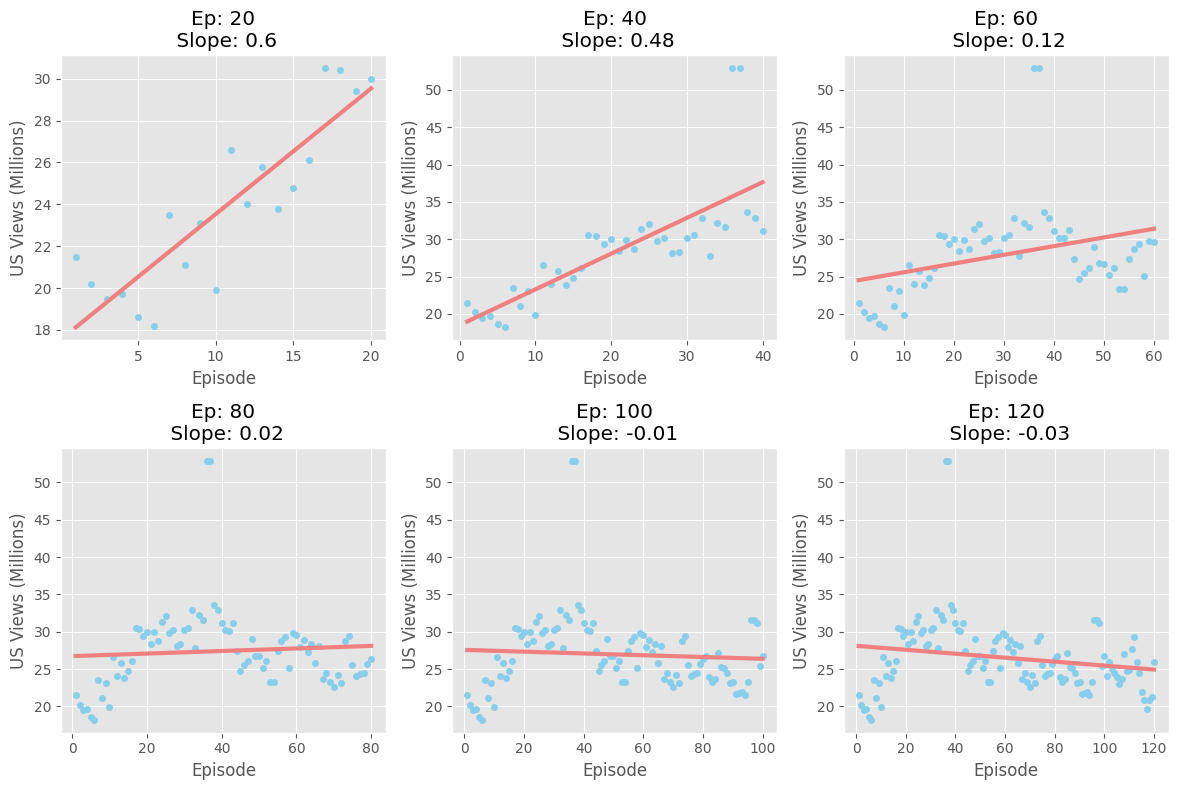

In [ ]:
def lr(ax, no_eps):
    df = episodes[['us_views_millions']].assign(episode=np.arange(1, episodes.shape[0] + 1)).take(np.arange(no_eps))
    X = df['episode']
    y = df['us_views_millions']

    model = LinearRegression()
    model.fit(X.values.reshape(-1, 1), y)

    y_pred = model.predict(X.values.reshape(-1, 1))
    ax.scatter(X, y, color='skyblue', s=20)
    ax.plot(X, y_pred, color='lightcoral', linewidth=3)
    ax.set_title(f'Ep: {no_eps}\n Slope: {np.round(model.coef_[0], 2)}')
    ax.set_xlabel('Episode')
    ax.set_ylabel('US Views (Millions)')

n_plots = len(np.arange(20, 140, 20))
n_cols = 3
n_rows = (n_plots + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))

axes = axes.flatten()

for i, ep in enumerate(np.arange(20, 140, 20)):
    lr(axes[i], ep)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

if i==0 and j == 0:
  axes.set_ylabel('US Views (Millions)')


plt.tight_layout()

plt.savefig('episode_views_plot.png', dpi=300)

plt.show()


from above plots we see that reboot should have episodes around 80